# Prerequisites

Please make sure to follow these steps to start using TimeGEN: 

* Register for a valid Azure account with subscription 
* Make sure you have access to [Azure AI Studio](https://learn.microsoft.com/en-us/azure/ai-studio/what-is-ai-studio?tabs=home)
* Create a project and resource group
* Select `TimeGEN-1`.

    > Notice that some models may not be available in all the regions in Azure AI and Azure Machine Learning. On those cases, you can create a workspace or project in the region where the models are available and then consume it with a connection from a different one. To learn more about using connections see [Consume models with connections](https://learn.microsoft.com/en-us/azure/ai-studio/how-to/deployments-connections)

* Deploy with "Pay-as-you-go"

Once deployed successfully, you should be assigned for an API endpoint and a security key for inference.

To complete this tutorial, you will need to:

* Install `nixtla` and `pandas`:

    ```bash
    pip install nixtla pandas
    ```

# Fine-tuning

Fine-tuning is a powerful process for utilizing TimeGEN more effectively. Foundation models such as TimeGEN are pre-trained on vast amounts of data, capturing wide-ranging features and patterns. These models can then be specialized for specific contexts or domains. With fine-tuning, the model's parameters are refined to forecast a new task, allowing it to tailor its vast pre-existing knowledge towards the requirements of the new data. Fine-tuning thus serves as a crucial bridge, linking TimeGEN's broad capabilities to your tasks specificities.

Concretely, the process of fine-tuning consists of performing a certain number of training iterations on your input data minimizing the forecasting error. The forecasts will then be produced with the updated model. To control the number of iterations, use the `finetune_steps` argument of the `forecast` method.

To complete this tutorial, you will need to:

* Install `nixtla` and `pandas`:

    ```bash
    pip install nixtla pandas
    ```

## 1. Import packages
First, we import the required packages and initialize the Nixtla client

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    base_url="you azure ai endpoint",
    api_key="your api_key",
)

## 2. Load data

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv"
)
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## 3. Fine-tuning

In [ ]:
timegpt_fcst_finetune_df = nixtla_client.forecast(
    df=df,
    h=12,
    finetune_steps=10,
    time_col="timestamp",
    target_col="value",
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


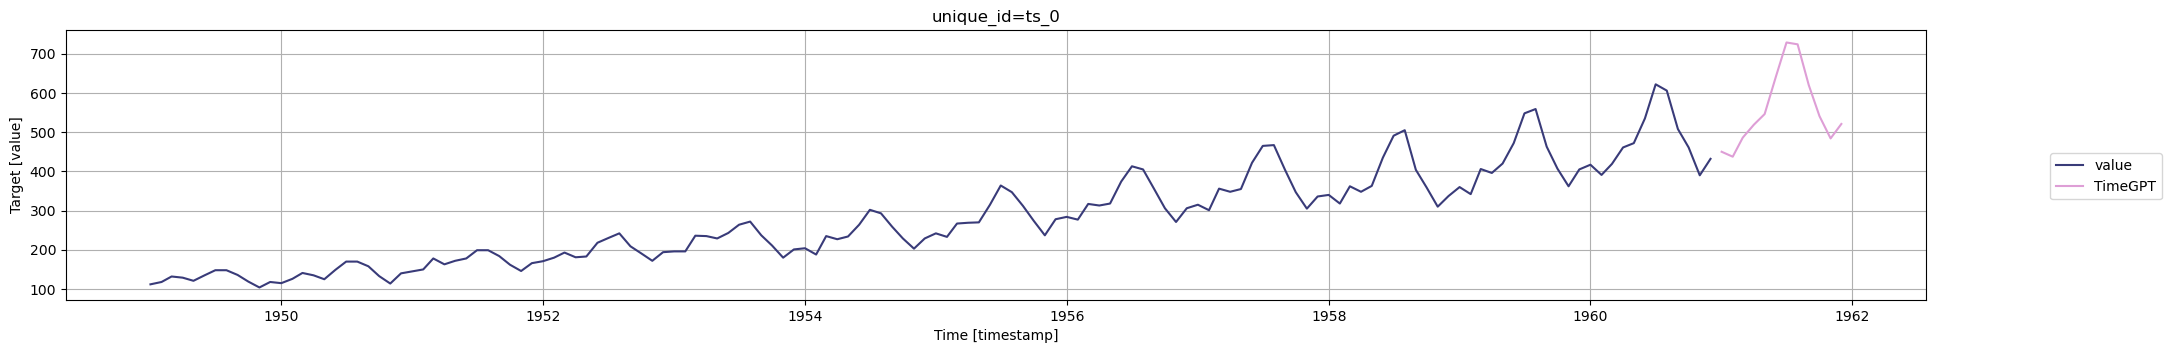

In [ ]:
nixtla_client.plot(
    df,
    timegpt_fcst_finetune_df,
    time_col="timestamp",
    target_col="value",
)

In this code, `finetune_steps=10` means the model will go through 10 iterations of training on your time series data.

Keep in mind that fine-tuning can be a bit of trial and error. You might need to adjust the number of `finetune_steps` based on your specific needs and the complexity of your data. It's recommended to monitor the model's performance during fine-tuning and adjust as needed. Be aware that more `finetune_steps` may lead to longer training times and could potentially lead to overfitting if not managed properly. 

Remember, fine-tuning is a powerful feature, but it should be used thoughtfully and carefully.

For a detailed guide on using a specific loss function for fine-tuning, check out the [Fine-tuning with a specific loss function](https://docs.nixtla.io/docs/tutorials-fine_tuning_with_a_specific_loss_function) tutorial.